<a href="https://colab.research.google.com/github/andreidm92/computer_vision_tasks/blob/main/practice/Day25_SAM_prompt_segmentation_FIXED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 День 25 — Prompt-based segmentation: SAM (Segment Anything Model)
Из этого ноутбука ты узнаешь, как использовать модель SAM для выделения объектов по промптам, как визуализировать это через OpenCV, и как выполнить калибровку камеры через шахматную доску.

## 📌 Основное задание: Prompt-based segmentation с SAM
### 🔬 Теория
**Segment Anything Model (SAM)** — мощная модель от Meta AI, способная выделять объекты по промптам:

- Точка (point prompt)
- Бокс (box prompt)
- Маска (mask prompt)

Модель состоит из 3 частей:
1. Image encoder (ViT)
2. Prompt encoder
3. Mask decoder

### 🧮 Формула:
$$
\text{Mask} = D(E_I(I), E_p(p))
$$
где:
- $E_I$ — энкодер изображения;
- $E_p$ — энкодер промпта;
- $D$ — декодер маски.

### 🔧 Установка
```bash
pip install git+https://github.com/facebookresearch/segment-anything.git
pip install opencv-python matplotlib
```

### 📥 Загрузка модели и предсказание
```python
# Пример загрузки модели и предсказания
from segment_anything import SamPredictor, sam_model_registry
import cv2, numpy as np

# Загрузка модели
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b.pth")
predictor = SamPredictor(sam)

# Загрузка изображения и установка точки
image = cv2.imread('example.jpg')
predictor.set_image(image)
input_point = np.array([[300, 400]])
input_label = np.array([1])
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)
```


1. sam_model_registry — это словарь
В библиотеке segment_anything, объект sam_model_registry — это обычный Python-словарь (dict), где ключами являются строки, обозначающие тип архитектуры модели, а значениями — соответствующие классы моделей.

Пример ключей:

sam_model_registry = {
    "vit_b": SamModel_ViT_B,
    "vit_l": SamModel_ViT_L,
    "vit_h": SamModel_ViT_H,
}

2. "vit_b" — тип модели
Ты выбираешь вариант SAM на базе Vision Transformer B (base).

Значит:

sam_model_registry["vit_b"]
даёт тебе класс модели SAM на основе ViT-B.

3. (checkpoint="sam_vit_b.pth") — создание экземпляра модели
После того как ты получаешь класс модели, ты сразу его вызываешь как функцию, передавая путь к весу модели.

Это эквивалентно:

SamClass = sam_model_registry["vit_b"]
sam = SamClass(checkpoint="sam_vit_b.pth")
Таким образом, ты загружаешь модель SAM с весами из файла sam_vit_b.pth.

In [2]:
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install opencv-python matplotlib


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-xfnryu1o
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-xfnryu1o
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=faeda62021f8f100c00ab7d9bbdbef117bec0b20ee51827da5e41cd8cc5f8317
  Stored in directory: /tmp/pip-ephem-wheel-cache-47fe_nzp/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything


In [3]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth -O sam_vit_b.pth


--2025-05-23 21:04:19--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.167.112.66, 3.167.112.129, 3.167.112.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.167.112.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘sam_vit_b.pth’

sam_vit_b.pth       100%[===================>] 357.67M   209MB/s    in 1.7s    

2025-05-23 21:04:20 (209 MB/s) - ‘sam_vit_b.pth’ saved [375042383/375042383]



In [4]:
# Пример загрузки модели и предсказания
from segment_anything import SamPredictor, sam_model_registry
import cv2, numpy as np

# Загрузка модели
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b.pth")
predictor = SamPredictor(sam)

# Загрузка изображения и установка точки
image = cv2.imread('/content/monkey.jpeg')
predictor.set_image(image)
input_point = np.array([[300, 400]])
input_label = np.array([1])
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

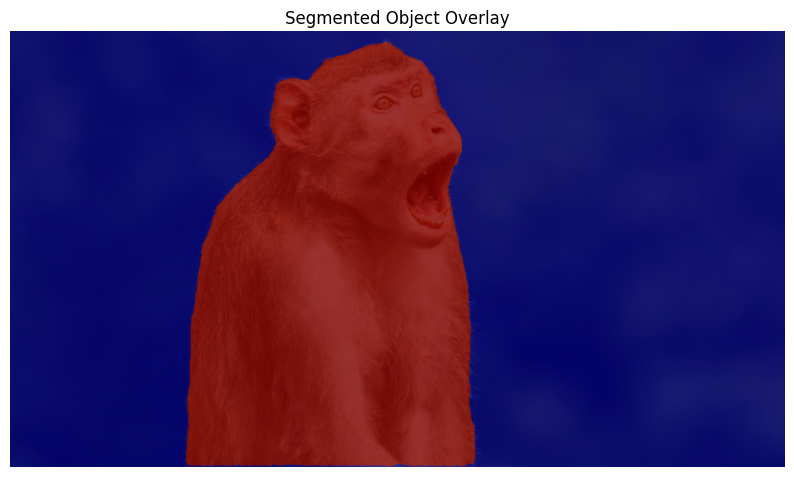

In [7]:
import matplotlib.pyplot as plt

# Преобразуем маску в uint8
mask = masks[0]  # Берём первую маску
mask_uint8 = (mask * 255).astype(np.uint8)

# Накладываем маску на изображение
colored_mask = cv2.applyColorMap(mask_uint8, cv2.COLORMAP_JET)
overlay = cv2.addWeighted(image, 0.2, colored_mask, 0.8, 0)

# Переводим BGR -> RGB для отображения в matplotlib
overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

# Отображаем результат
plt.figure(figsize=(10, 10))
plt.imshow(overlay_rgb)
plt.title("Segmented Object Overlay")
plt.axis("off")
plt.show()


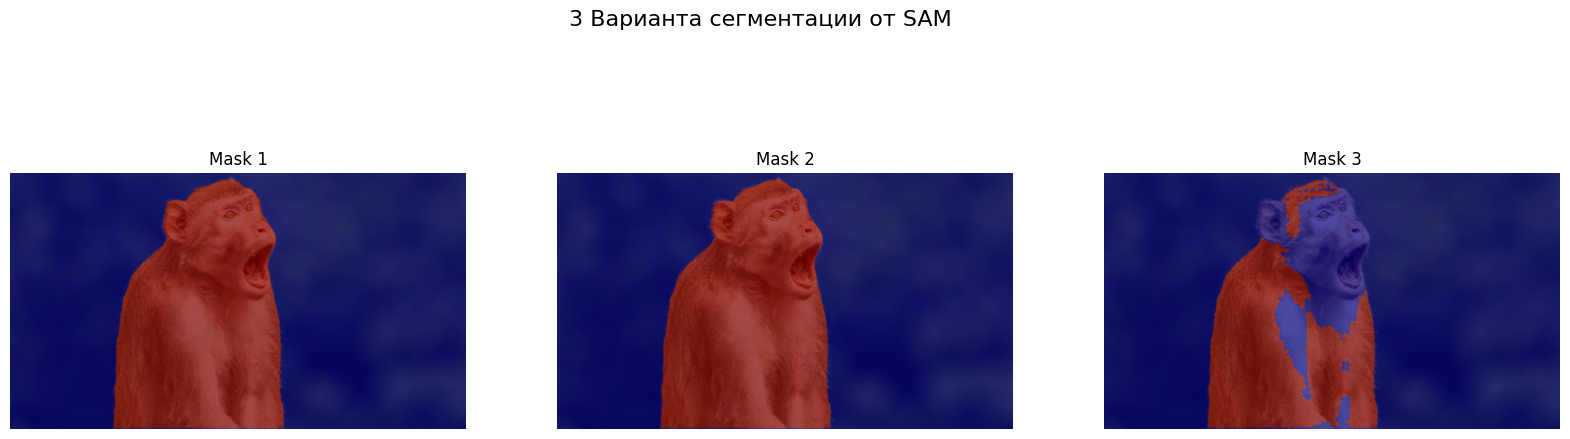

In [9]:
import matplotlib.pyplot as plt

# Преобразование изображения из BGR в RGB для matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 6))

for i in range(3):
    mask = masks[i]
    mask_uint8 = (mask * 255).astype(np.uint8)

    # Создание цветной маски
    colored_mask = cv2.applyColorMap(mask_uint8, cv2.COLORMAP_JET)

    # Наложение на оригинал
    overlay = cv2.addWeighted(image, 0.3, colored_mask, 0.7, 0)
    overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

    # Отображение
    plt.subplot(1, 3, i+1)
    plt.imshow(overlay_rgb)
    plt.title(f"Mask {i+1}")
    plt.axis("off")

plt.suptitle("3 Варианта сегментации от SAM", fontsize=16)
plt.show()


🎯 Зачем 3 маски?
Когда ты используешь:

predictor.predict(..., multimask_output=True)
SAM возвращает три разных варианта сегментации одного объекта. Это сделано, чтобы учесть неоднозначность промпта. Например:

Ты кликнул в область слияния двух объектов;

Граница объекта не очень чёткая;

В точке клика присутствует мелкая деталь.

📦 Чем отличаются маски?
1. Форма
Одна маска может быть широкой и "захватывать" больше фона;

Другая — более точной и компактной.

2. Контекст
Маски могут включать или исключать близлежащие области:

Например, ухо 🐵 vs. голова 🐵 vs. всё тело.

3. Score (уверенность)
Каждая маска сопровождается метрикой score, которая говорит, насколько уверена модель в корректности данной маски.

# Выведет что-то вроде: [0.89, 0.72, 0.66]
🧠 Как это реализовано в SAM?
Архитектура SAM умеет генерировать несколько масок в один проход с помощью разных вариантов "attention" и "token'ов", чтобы интерпретировать prompt по-разному.
Это не случайность — это архитектурная особенность модели.

✅ Что делать на практике?
Визуально осматривай все 3 варианта.

Или выбирай по scores[i]:

best_index = np.argmax(scores)
best_mask = masks[best_index]

## 🧰 Мини-урок OpenCV: Визуализация mask SAM
### 💡 Цель:
Визуализировать маску SAM, наложенную на изображение с помощью OpenCV.

### 📘 Теория
Маска SAM — это $M \in \{0,1\}^{H \times W}$. Мы можем накладывать её так:
$$
I_{overlay} = \alpha I + \beta M + \gamma
$$

### 🧪 Код
```python
# Визуализация маски
overlay = image.copy()
mask_uint8 = (masks[0] * 255).astype(np.uint8)
colored_mask = cv2.applyColorMap(mask_uint8, cv2.COLORMAP_JET)
overlay = cv2.addWeighted(colored_mask, 0.5, image, 0.5, 0)
cv2.imshow("Overlay", overlay)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

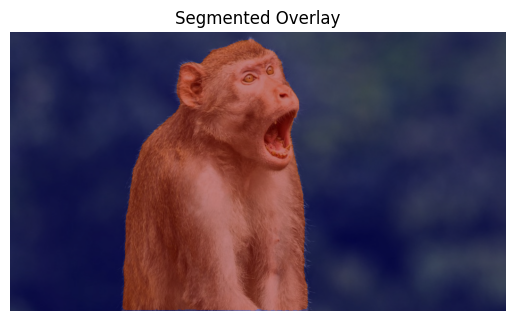

In [12]:
import matplotlib.pyplot as plt

overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)
plt.imshow(overlay_rgb)
plt.axis("off")
plt.title("Segmented Overlay")
plt.show()


Чтобы отобразить маску в чёрно-белом виде, тебе нужно не накладывать цветовую карту, а просто использовать бинарную или оттенки серого.

Вот два варианта:
1. Монохромная маска
2. Полупрозрачное наложение маски на оригинал (в оттенках серого)

✅ Вариант 1: Просто маска (оттенки серого)

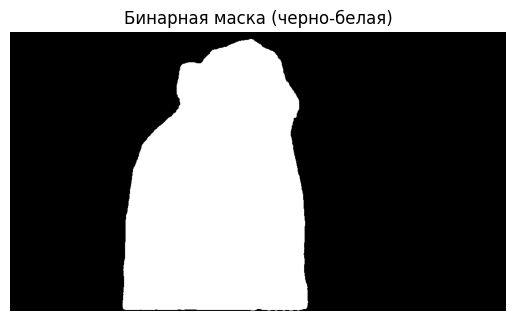

In [13]:
import matplotlib.pyplot as plt

# Берём первую маску
mask = masks[0]

# Визуализация
plt.imshow(mask, cmap='gray')
plt.title("Бинарная маска (черно-белая)")
plt.axis("off")
plt.show()


✅ Вариант 2: Маска наложена на изображение как прозрачный слой

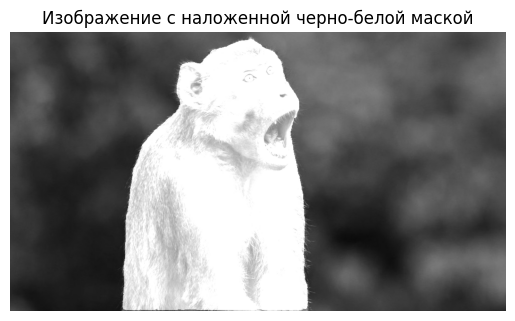

In [14]:
# Преобразуем mask в 3 канала и масштабируем
mask_3ch = (mask * 255).astype(np.uint8)
mask_3ch = cv2.merge([mask_3ch] * 3)

# Сделаем изображение черно-белым
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR)

# Полупрозрачное наложение
overlay = cv2.addWeighted(gray_img, 1.0, mask_3ch, 0.5, 0)

# Отображение
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Изображение с наложенной черно-белой маской")
plt.axis("off")
plt.show()


## 📐 Линейная алгебра: Калибровка камеры по шахматной доске (метод Чжана)
### 📘 Теория
Переход из 3D в 2D через модель камеры:
$$
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix} = K [R | t] \begin{bmatrix} X \\ Y \\ Z \\ 1 \end{bmatrix}
$$

где $K$ — матрица камеры:
$$
K =
\begin{bmatrix}
f_x & 0 & c_x \\
0 & f_y & c_y \\
0 & 0 & 1
\end{bmatrix}
$$

### 🔧 Реализация
```python
import cv2
import numpy as np

objp = np.zeros((6*7, 3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1, 2)

objpoints = []
imgpoints = []
images = ['calib1.jpg', 'calib2.jpg']

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (7,6), None)
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print("Camera matrix:", mtx)
```

In [15]:
!wget https://github.com/opencv/opencv/raw/master/samples/data/left01.jpg
!wget https://github.com/opencv/opencv/raw/master/samples/data/left02.jpg
!wget https://github.com/opencv/opencv/raw/master/samples/data/left03.jpg
!wget https://github.com/opencv/opencv/raw/master/samples/data/left04.jpg
!wget https://github.com/opencv/opencv/raw/master/samples/data/left05.jpg
!wget https://github.com/opencv/opencv/raw/master/samples/data/left06.jpg
!wget https://github.com/opencv/opencv/raw/master/samples/data/left07.jpg
!wget https://github.com/opencv/opencv/raw/master/samples/data/left08.jpg
!wget https://github.com/opencv/opencv/raw/master/samples/data/left09.jpg
!wget https://github.com/opencv/opencv/raw/master/samples/data/left10.jpg
!wget https://github.com/opencv/opencv/raw/master/samples/data/left11.jpg
!wget https://github.com/opencv/opencv/raw/master/samples/data/left12.jpg
!wget https://github.com/opencv/opencv/raw/master/samples/data/left13.jpg
!wget https://github.com/opencv/opencv/raw/master/samples/data/left14.jpg


--2025-05-23 21:35:36--  https://github.com/opencv/opencv/raw/master/samples/data/left01.jpg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/samples/data/left01.jpg [following]
--2025-05-23 21:35:36--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/left01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27908 (27K) [image/jpeg]
Saving to: ‘left01.jpg’

left01.jpg          100%[===================>]  27.25K  --.-KB/s    in 0s      

2025-05-23 21:35:37 (75.5 MB/s) - ‘left01.jpg’ saved [27908/27908]

--2025-05-23 21:35:37--  https://github.com/opencv/op

In [16]:
import cv2
import numpy as np

objp = np.zeros((6*7, 3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1, 2)

objpoints = []
imgpoints = []
images = ['left01.jpg', 'left02.jpg', 'left03.jpg', 'left04.jpg', 'left05.jpg', 'left06.jpg', 'left07.jpg', 'left08.jpg', 'left09.jpg', 'left11.jpg', 'left12.jpg', 'left13.jpg', 'left14.jpg']

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (7,6), None)
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print("Camera matrix:", mtx)

Camera matrix: [[533.25756959   0.         341.21541766]
 [  0.         533.00575859 234.56689378]
 [  0.           0.           1.        ]]


📐 1. Создание координат в реальном мире
python
Копировать
Редактировать
objp = np.zeros((6*7, 3), np.float32)
objp[:, :2] = np.mgrid[0:7, 0:6].T.reshape(-1, 2)
Это создаёт массив точек на шахматной доске в 3D-пространстве — но
𝑍
=
0
Z=0, потому что доска плоская.

np.mgrid[0:7, 0:6] создаёт сетку
7
×
6
7×6 точек — это 6 строк и 7 колонок внутренних углов (по углам чёрных и белых клеток).

reshape(-1, 2) превращает их в список точек, а objp[:, :2] заполняет их в массив.

💡 Визуально:
plaintext
Копировать
Редактировать
objp =
[[0, 0, 0],
 [1, 0, 0],
 [2, 0, 0],
 ...
 [6, 5, 0]]
